# Notebook k-NN algorithm in automated Brest Cancer detection

Code used in k-NN algorithm in automated Brest Cancer detection mini project with comments outlining all steps

In [3]:
# Install required Python packages with specific versions
!pip install numpy==2.2.0
!pip install pandas==2.2.3
!pip install scikit-learn==1.6.0
!pip install matplotlib==3.9.3
!pip install seaborn==0.13.2

  Using cached numpy-2.2.0-cp312-cp312-win_amd64.whl.metadata (60 kB)
Using cached numpy-2.2.0-cp312-cp312-win_amd64.whl (12.6 MB)
  Attempting uninstall: numpy
    Found existing installation: numpy 1.26.4
    Uninstalling numpy-1.26.4:
      Successfully uninstalled numpy-1.26.4


  You can safely remove it manually.
  You can safely remove it manually.
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
contourpy 1.2.0 requires numpy<2.0,>=1.20, but you have numpy 2.2.0 which is incompatible.
gensim 4.3.3 requires numpy<2.0,>=1.18.5, but you have numpy 2.2.0 which is incompatible.
numba 0.60.0 requires numpy<2.1,>=1.22, but you have numpy 2.2.0 which is incompatible.
tensorflow 2.19.0 requires numpy<2.2.0,>=1.26.0, but you have numpy 2.2.0 which is incompatible.


  Using cached numpy-1.26.4-cp312-cp312-win_amd64.whl.metadata (61 kB)
Using cached numpy-1.26.4-cp312-cp312-win_amd64.whl (15.5 MB)
  Attempting uninstall: numpy
    Found existing installation: numpy 2.2.0
    Uninstalling numpy-2.2.0:
      Successfully uninstalled numpy-2.2.0


In [4]:
# Import required libraries for data analysis and visualization
import numpy as np  
import matplotlib.pyplot as plt 
import pandas as pd
import numpy as np
import seaborn as sns
import csv
import math 

# Import required machine learning related libraries
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, make_scorer, recall_score

%matplotlib inline

In [5]:
# Define the URL pointing to the Wisconsin Breast Cancer dataset used in this project stored in a GitHub repository
URL = "https://raw.githubusercontent.com/stedy/Machine-Learning-with-R-datasets/refs/heads/master/wisc_bc_data.csv"

In [6]:
# Load the dataset from the specified URL into a pandas DataFrame
df = pd.read_csv(URL)

# Display the first 5 rows of the DataFrame to inspect the data
df.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [7]:
# Display concise summary of the DataFrame
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 32 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

In [8]:
# Drop the 'id' column from the dataframe
df = df.drop('id', axis=1)

# Display the first 5 rows of the dataframe to inspect the data after removing the 'id' column
df.head()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [9]:
# Count the occurrences of each unique value in the 'diagnosis' column
# This helps us understand the distribution of diagnoses in the dataset
df['diagnosis'].value_counts()

diagnosis
B    357
M    212
Name: count, dtype: int64

In [10]:
# Convert diagnosis column from categorical (M/B) to binary values
# 'M' (Malignant) becomes 1, 'B' (Benign) becomes 0
df['Label_diagnosis'] = df['diagnosis'].apply(lambda x: 1 if x == 'M' else 0)

# Display the dataframe with the new Label_diagnosis column
print(df)

    diagnosis  radius_mean  texture_mean  perimeter_mean  area_mean  \
0           M        17.99         10.38          122.80     1001.0   
1           M        20.57         17.77          132.90     1326.0   
2           M        19.69         21.25          130.00     1203.0   
3           M        11.42         20.38           77.58      386.1   
4           M        20.29         14.34          135.10     1297.0   
..        ...          ...           ...             ...        ...   
564         M        21.56         22.39          142.00     1479.0   
565         M        20.13         28.25          131.20     1261.0   
566         M        16.60         28.08          108.30      858.1   
567         M        20.60         29.33          140.10     1265.0   
568         B         7.76         24.54           47.92      181.0   

     smoothness_mean  compactness_mean  concavity_mean  concave points_mean  \
0            0.11840           0.27760         0.30010              

In [11]:
# Drop the 'diagnosis' and 'Label_diagnosis' columns from the dataframe to create explorotory feature matrix X
X = df.drop(['diagnosis','Label_diagnosis'],axis=1)
# Extract the target variable y from the 'Label_diagnosis' column
y = df['Label_diagnosis']

# Display the feature matrix X
X

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,0.07871,...,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,0.05667,...,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,0.05999,...,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,0.09744,...,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,0.05883,...,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623,...,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533,...,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648,...,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,0.07016,...,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400


In [12]:
# Accessing the target variable

y

0      1
1      1
2      1
3      1
4      1
      ..
564    1
565    1
566    1
567    1
568    0
Name: Label_diagnosis, Length: 569, dtype: int64

In [13]:
# Normalize the features using StandardScaler
X_norm = StandardScaler().fit_transform(X)

In [14]:
# Split the normalized data into training and testing sets
# - X_norm: normalized feature data
# - y: target variable
# - stratify=y: ensures the class distribution is preserved in both sets
# - test_size=0.3: 30% of data used for testing, 70% for training
# - random_state=4: sets seed for reproducible results
X_train, X_test, y_train, y_test = train_test_split(X_norm, y, stratify=y, test_size=0.3, random_state=4)

In [15]:
# Print the class distribution (proportion of each class) in the original dataset
print("Proportion in original dataset:", y.value_counts(normalize=True))
# Print the class distribution in the training set to verify stratification
print("Proportion in training set:", y_train.value_counts(normalize=True))
# Print the class distribution in the test set to verify stratification
print("Proportion in test set:", y_test.value_counts(normalize=True))

Proportion in original dataset: Label_diagnosis
0    0.627417
1    0.372583
Name: proportion, dtype: float64
Proportion in training set: Label_diagnosis
0    0.628141
1    0.371859
Name: proportion, dtype: float64
Proportion in test set: Label_diagnosis
0    0.625731
1    0.374269
Name: proportion, dtype: float64


In [16]:
def generate_list(limit):
    result = []
    num = 3
    while num <= limit:
        result.append(num)
        num += 2
    return result

# Example usage:
limit = math.sqrt(X_train.shape[0])
k = generate_list(limit)
print(k)

[3, 5, 7, 9, 11, 13, 15, 17, 19]


In [17]:
def generate_list(limit):
    """
    Generate a list of odd numbers starting from 3 up to the specified limit.
    
    Args:
        limit (float): The upper bound (inclusive) for the generated numbers
        
    Returns:
        list: A list of odd numbers from 3 to limit
    """
    result = []  # Initialize empty list to store results
    num = 3      # Start with the first odd number after 1
    while num <= limit:
        result.append(num)  # Add current number to result list
        num += 2            # Increment by 2 to get the next odd number
    return result

# Example usage:
limit = math.sqrt(X_train.shape[0])  # Calculate limit as square root of number of training samples
k = generate_list(limit)             # Generate list of odd numbers up to the calculated limit
print(k)                             # Display the generated list

[3, 5, 7, 9, 11, 13, 15, 17, 19]


In [18]:
# Define your model - KNN classifier with default parameters
knn = KNeighborsClassifier()

# Set up hyperparameter grid for tuning
param_grid = {
    'n_neighbors': k,  # k is a list of neighbor values defined earlier
    'weights': ['uniform', 'distance'],  # Test both equal weights and distance-weighted voting
    'algorithm': ['auto','ball_tree', 'kd_tree', 'brute']  # Test all available algorithms for finding nearest neighbors
}

# Perform Grid Search with 10-fold cross-validation to find optimal parameters
grid_search = GridSearchCV(knn, param_grid, cv=10, scoring='accuracy')
grid_search.fit(X_train, y_train)  # Train the model with all parameter combinations

# Convert grid search results to a DataFrame for easier analysis
results = pd.DataFrame(grid_search.cv_results_)
# Print the best parameters found during grid search
print("Best parameters:", grid_search.best_params_)


Best parameters: {'algorithm': 'auto', 'n_neighbors': 3, 'weights': 'uniform'}


In [39]:
# Evaluate the best model on train data from grid search
best_knn = grid_search.best_estimator_  # Get the best KNN model from grid search
y_pred = best_knn.predict(X_train)  # Make predictions on the train set
print("Confusion Matrix:\n", confusion_matrix(y_train, y_pred))  # Display confusion matrix as text
print("Classification Report:\n", classification_report(y_train, y_pred))  # Display precision, recall, f1-score metrics

Confusion Matrix:
 [[250   0]
 [  4 144]]
Classification Report:
               precision    recall  f1-score   support

           0       0.98      1.00      0.99       250
           1       1.00      0.97      0.99       148

    accuracy                           0.99       398
   macro avg       0.99      0.99      0.99       398
weighted avg       0.99      0.99      0.99       398



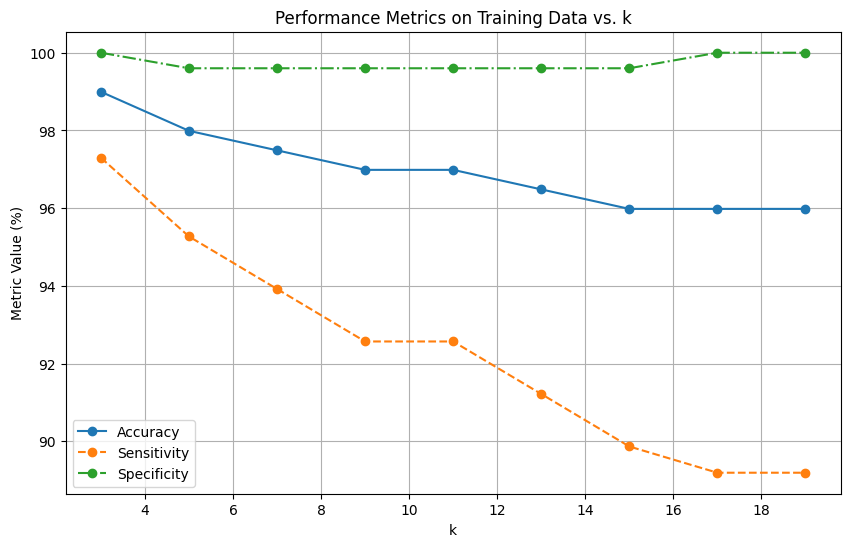

In [19]:
# Define fixed parameters
weights = 'uniform'  # Use uniform weights (all points in neighborhood weighted equally)
algorithm = 'auto'   # Let KNN choose the most appropriate algorithm automatically

# Initialize lists to store metrics
k_values = k  # Assign the pre-defined k values range to k_values
accuracies = []      # List to store accuracy for each k value
sensitivities = []   # List to store sensitivity (recall) for each k value
specificities = []   # List to store specificity for each k value

# Loop through k values
for k in k_values:
    # Create KNN classifier with current k value and fixed parameters
    knn = KNeighborsClassifier(n_neighbors=k, weights=weights, algorithm=algorithm)
    knn.fit(X_train, y_train)  # Train the model on the training data
    y_pred = knn.predict(X_train)  # Predict on the training data (instead of the test set)
    
    # Calculate confusion matrix
    cm = confusion_matrix(y_train, y_pred)
    TN, FP, FN, TP = cm.ravel()  # Extract values from confusion matrix: True Negatives, False Positives, False Negatives, True Positives

    # Calculate metrics
    accuracy = (accuracy_score(y_train, y_pred)*100)  # Calculate accuracy as percentage
    sensitivity = (recall_score(y_train, y_pred)*100)  # Calculate sensitivity (recall) as percentage
    specificity = ((TN / (TN + FP))*100) if (TN + FP) != 0 else 0  # Calculate specificity as percentage with zero division protection

    # Append metrics to respective lists
    accuracies.append(accuracy)
    sensitivities.append(sensitivity)
    specificities.append(specificity)

# Plot the results
plt.figure(figsize=(10, 6))  # Create figure with specified size
plt.plot(k_values, accuracies, label='Accuracy', marker='o', linestyle='-')  # Plot accuracy line
plt.plot(k_values, sensitivities, label='Sensitivity', marker='o', linestyle='--')  # Plot sensitivity line
plt.plot(k_values, specificities, label='Specificity', marker='o', linestyle='-.')  # Plot specificity line
plt.title('Performance Metrics on Training Data vs. k')  # Add title to the plot
plt.xlabel('k')  # Label x-axis
plt.ylabel('Metric Value (%)')  # Label y-axis
plt.legend()  # Add legend to distinguish between metrics
plt.grid(True)  # Add grid for better readability
plt.show()  # Display the plot

Confusion Matrix:
 [[106   1]
 [  8  56]]
Classification Report:
               precision    recall  f1-score   support

           0       0.93      0.99      0.96       107
           1       0.98      0.88      0.93        64

    accuracy                           0.95       171
   macro avg       0.96      0.93      0.94       171
weighted avg       0.95      0.95      0.95       171



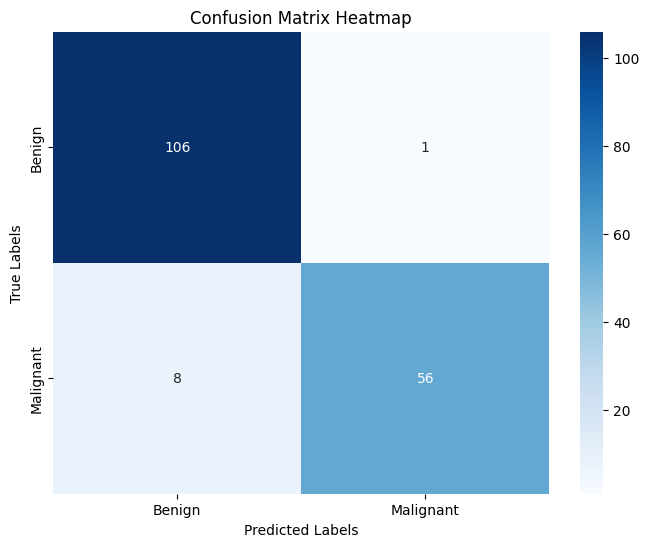

In [20]:
# Evaluate the best model on test data from grid search
best_knn = grid_search.best_estimator_  # Get the best KNN model from grid search
y_pred = best_knn.predict(X_test)  # Make predictions on the test set
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))  # Display confusion matrix as text
print("Classification Report:\n", classification_report(y_test, y_pred))  # Display precision, recall, f1-score metrics


# Compute confusion matrix for visualization
cm = confusion_matrix(y_test, y_pred)  # Calculate confusion matrix values
cm_labels = ['Benign', 'Malignant']  # Define class labels for the visualization

# Create a heatmap visualization of the confusion matrix
plt.figure(figsize=(8, 6))  # Set the figure size
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=cm_labels, yticklabels=cm_labels)  # Create heatmap with annotations
plt.xlabel('Predicted Labels')  # Label the x-axis
plt.ylabel('True Labels')  # Label the y-axis
plt.title('Confusion Matrix Heatmap')  # Add a title to the plot
plt.show()  # Display the heatmap